In [1]:
%load_ext sql

# Connect to CHINOOK database

Conect directly from sqlite folder

In [2]:
%sql sqlite:///C:/sqlite/chinook.db

In [14]:
%%sql
PRAGMA table_info(invoice_line);

 * sqlite:///C:/sqlite/chinook.db
Done.


cid,name,type,notnull,dflt_value,pk
0,invoice_line_id,INTEGER,1,None,1
1,invoice_id,INTEGER,1,None,0
2,track_id,INTEGER,1,None,0
3,unit_price,"NUMERIC(10,2)",1,None,0
4,quantity,INTEGER,1,None,0


# 1) Introduction

In this lesson, we'll learn how to apply summary statistics to **grouped data**.

## Instructions

1. Write a query that counts the rows in the invoice table where the billing_country is equal to "USA".

    Use the clauses SELECT, FROM, WHERE.

    Use the COUNT aggregate function.

    Rename the column as `num_row`.


In [4]:
%%sql
SELECT COUNT(*) as num_row
  FROM invoice
 WHERE billing_country = 'USA'

 * sqlite:///C:/sqlite/chinook.db
Done.


num_row
131


# 2) Counting Rows by Group

We can see other billing countries in the `invoice` table (`France` and `Canada`), and we may want to count the rows for each of them. To do so, following the previous query lines, we can change the condition to `WHERE billing_country = 'France'` and to `WHERE billing_country = 'Canada'`.

This technique works correctly, but it doesn't scale if we have several billing countries. For example, we know that, in our table, we have 24 billing countries instead of three. It's just not efficient to repeat this query 24 times. Fortunately, SQL offers the `GROUP BY` clause, which can solve this problem.

Using GROUP BY alone we can see the number of rows for each group, but the groups themselves are missing. To show the groups, we have to add the column name in the `SELECT` statement.

```sql
SELECT billing_country, COUNT(*) AS num_row
  FROM example
 GROUP BY billing_country;
```

## Instructions

1. Write a query that counts the rows for each billing country.

    Use the clause `GROUP BY` to group values by `billing_country`.

    Display the number of rows with associated groups.

    Rename the count column as `num_row`.

In [9]:
%%sql
SELECT billing_country,
       COUNT(*) as num_row
  FROM invoice
  GROUP BY billing_country

 * sqlite:///C:/sqlite/chinook.db
Done.


billing_country,num_row
Argentina,5
Australia,10
Austria,9
Belgium,7
Brazil,61
Canada,76
Chile,13
Czech Republic,30
Denmark,10
Finland,11


# 3) Summary Statistics by Group

Using the `GROUP BY` clause, we can specify what groups could be, and then SQL applies the aggregate function to each group.

The process to get this result is as follows:

1. SQL splits rows into groups based on the distinct values.

1. SQL applies the aggregate function to each group separately.

1. SQL combines the group's results into a table.

## Instructions

1. Write a query that sums the line total for each invoice identifier from the `invoice_line` table.

* Select the invoice identifier, which is denoted as `invoice_id`.

* Compute the line total by multiplying the `unit_price` and `quantity` columns.

    * Rename the aggregated column as total.

* Group the rows by `invoice_id`.

* Limit the number of rows to display to the first five.

1. Compare the resulting total column to the total column from the invoice table.

In [10]:
%%sql
SELECT *,
       SUM(unit_price * quantity) as total
FROM invoice_line
GROUP by invoice_id
LIMIT 5

 * sqlite:///C:/sqlite/chinook.db
Done.


invoice_line_id,invoice_id,track_id,unit_price,quantity,total
1,1,1158,0.99,1,15.84
17,2,3476,0.99,1,9.9
27,3,2516,0.99,1,1.98
29,4,3448,0.99,1,7.92
37,5,1986,0.99,1,16.83


# 4) Revisiting the Order of Clauses

 let's see where it will be in the order of clauses.

It's critical to know the order of clauses mainly because, as we learned before, the order of the clauses is not interchangeable. Besides, writing clauses that way helps us to write correct queries and debug if an error occurs.

The order of clauses we have in mind so far is as follows:

> SELECT > FROM > WHERE > ORDER BY > LIMIT

Now, let's introduce the GROUP BY clause in this order.

> SELECT > FROM > WHERE > GROUP BY > ORDER BY > LIMIT

The `GROUP BY` clause is after the `WHERE` clause and before the `ORDER BY` clause, and we must write queries in this order.

# 5) Revisiting the Order of Execution

As you might remember, the **order of execution** in SQL is different from the **order of clauses**. The order of clauses shows the order in which we must write queries, while the order of execution shows the execution order of clauses.

While we write the SELECT clause first, SQL runs it only after the GROUP BY clause.

> FROM > WHERE > GROUP BY > SELECT > ORDER BY > LIMIT

The two important things to remember about this order are the following:

* SQL always filters the rows with the WHERE clause before grouping the remaining rows.

* SQL always groups the rows with the GROUP BY clause before (possibly) ordering the result rows and limiting the number of rows to display.

# 6) Summary Statistics by Group Under Conditions

To count rows for each billing country, we've written the following query:

```sql
SELECT billing_country, COUNT(*) AS num_row
  FROM invoice
 GROUP BY billing_country;
```

Suppose we now want to repeat the same operation for only those whose total purchase amount is **less than or equal to $10**. We will add a condition to the previous query.

```sql
SELECT billing_country, COUNT(*) AS num_row
  FROM invoice
 WHERE total <= 10
 GROUP BY billing_country;
 ```

 ## Instructions

 Write a query that displays the table USA's average total purchase amount by state

* Count the rows for each billing state, and name it as `num_row`.

* Compute the average total purchase amount for each billing state using the `total` column, and name it as `avg_sale`.

* Use the `WHERE` clause to ensure that the billing country is `'USA'`.

* Group the rows by state using the `billing_state` column.

In [11]:
%%sql
SELECT billing_state,
       COUNT(*) as num_row,
       AVG(total) as avg_sale
  FROM invoice
 WHERE billing_country = 'USA'
 GROUP BY billing_state

 * sqlite:///C:/sqlite/chinook.db
Done.


billing_state,num_row,avg_sale
AZ,9,9.350000000000001
CA,29,7.715172413793104
FL,12,7.672499999999999
IL,8,8.91
MA,10,6.633
NV,11,8.28
NY,8,9.9
TX,12,7.177499999999999
UT,10,7.226999999999999
WA,12,8.1675


# 7) Summary Statistics By Ordered Groups

From previous exercise, to quickly identify the states with the highest number of clients, we can order this table in the **descending** order of `num_row`. To do this, we write the following query with the `ORDER BY `clause.

In [12]:
%%sql
SELECT billing_state, COUNT(*) AS num_row, AVG(total) AS avg_sale 
  FROM invoice 
 WHERE billing_country = 'USA'
 GROUP BY billing_state
 ORDER BY num_row DESC;

 * sqlite:///C:/sqlite/chinook.db
Done.


billing_state,num_row,avg_sale
CA,29,7.715172413793104
WA,12,8.1675
TX,12,7.177499999999999
FL,12,7.672499999999999
NV,11,8.28
WI,10,7.623
UT,10,7.226999999999999
MA,10,6.633
AZ,9,9.350000000000001
NY,8,9.9


California (CA) is clearly leading in terms of client traffic with 29 customers. However, we can't separate the next three states because they have the same number of clients (12). We can refine our query by ordering the rows with an additional criterion related to the average of sales (`avg_sale`) and only look at the **top three**.

In [13]:
%%sql
SELECT billing_state, COUNT(*) AS num_row, AVG(total) AS avg_sale 
  FROM invoice 
 WHERE billing_country = 'USA'
 GROUP BY billing_state
 ORDER BY num_row DESC, avg_sale DESC
 LIMIT 3;

 * sqlite:///C:/sqlite/chinook.db
Done.


billing_state,num_row,avg_sale
CA,29,7.715172413793104
WA,12,8.1675
FL,12,7.672499999999999


## Instructions

1. Write a query on the `invoice_line` table that displays a table following these instructions:

* Select the `track_id`, the number of rows as `num_row`, and the overall purchase amount as `overall_sale`.

* Compute `overall_sale` by multiplying the `unit_price` and quantity columns and then summing them.

* Group rows by `track_id`.

* Order the result rows by the `overall_sale` and `num_row` columns in **descending** order.

* Display only the **top five rows**.

In [15]:
%%sql
SELECT track_id,
       COUNT(*) as num_row,
       SUM(unit_price*quantity) as overall_sale
FROM invoice_line
GROUP BY track_id
ORDER BY overall_sale DESC, num_row DESC
LIMIT 5

 * sqlite:///C:/sqlite/chinook.db
Done.


track_id,num_row,overall_sale
3336,31,30.69
1489,14,13.86
1495,14,13.86
6,13,12.87
1487,13,12.87


# 8) Summary Statistics by Ordered Groups Under Conditions

On previous screens, we've reviewed the clauses we know and how they behave in the `GROUP BY` clause's presence. On this screen, we'll practice combining them all.

Our goal is to get the following table:

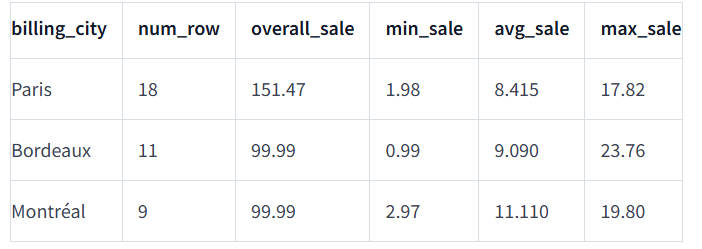


In [16]:
%%sql
SELECT billing_city,
       COUNT(*) as num_row,
       SUM(total) AS overall_sale,
       ROUND(MIN(total),2) AS min_sale,
       ROUND(AVG(total),3) AS avg_sale,
       ROUND(MAX(total),2) AS max_sale
FROM invoice
WHERE billing_country IN ('Canada','France')
GROUP BY billing_city
ORDER BY overall_sale DESC, num_row DESC
LIMIT 3;

 * sqlite:///C:/sqlite/chinook.db
Done.


billing_city,num_row,overall_sale,min_sale,avg_sale,max_sale
Paris,18,151.47,1.98,8.415,17.82
Bordeaux,11,99.99,0.99,9.09,23.76
Montréal,9,99.99,2.97,11.11,19.8


# Important TIP

When selecting a non-agreggated column along side with an aggregated one, we MUST include `GROUP BY NON-AGGREGATED column`

```sql
SELECT customer_id
          FROM invoice
         GROUP BY customer_id
         HAVING SUM(total) < 100)
```